In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
! git clone https://github.com/NCBI-Codeathons/pubmed-codeathon-team4

fatal: destination path 'pubmed-codeathon-team4' already exists and is not an empty directory.


In [4]:
df_large1 = pd.read_csv('/content/pubmed-codeathon-team4/data/results/larger-1/results.csv')

In [5]:
df_large2 = pd.read_csv('/content/pubmed-codeathon-team4/data/results/larger-2/results.csv')

In [6]:
df_hedge1 = pd.read_csv('/content/pubmed-codeathon-team4/data/results/newhedge-1/results.csv')

In [7]:
df_hedge2 = pd.read_csv('/content/pubmed-codeathon-team4/data/results/newhedge-2/results.csv')

In [8]:
df_hedge3 = pd.read_csv('/content/pubmed-codeathon-team4/data/results/newhedge-3/results.csv')

In [9]:
df_hedge4 = pd.read_csv('/content/pubmed-codeathon-team4/data/results/newhedge-4/results.csv')

In [10]:
frames = [df_large1,df_large2,df_hedge1,df_hedge2,df_hedge3,df_hedge4]

df_largest = pd.concat(frames)

In [11]:
df = df_largest.drop_duplicates()

In [12]:
df.head()

,search_index,sort,result_count,return_count,error_count,bias_dimension,bias_result_count
0,1133357,relevance,154,154,0,race,0
1,1133357,relevance,154,154,0,sexual_minorities,0
2,1133357,relevance,154,154,0,kids,6
3,1133357,relevance,154,154,0,elderly,5
4,1133357,relevance,154,154,0,women,2


In [13]:
df.count()

search_index         214292
sort                 214292
result_count         214292
return_count         214292
error_count          214292
bias_dimension       214292
bias_result_count    214292
dtype: int64

In [14]:
errors = df[(df.error_count > 0) | (df.result_count == 0)]
error_search_indices = errors.search_index.unique()
error_search_indices

df = df[~df.search_index.isin(error_search_indices)]
df.head()

,search_index,sort,result_count,return_count,error_count,bias_dimension,bias_result_count
0,1133357,relevance,154,154,0,race,0
1,1133357,relevance,154,154,0,sexual_minorities,0
2,1133357,relevance,154,154,0,kids,6
3,1133357,relevance,154,154,0,elderly,5
4,1133357,relevance,154,154,0,women,2


In [15]:
df.count()

search_index         196964
sort                 196964
result_count         196964
return_count         196964
error_count          196964
bias_dimension       196964
bias_result_count    196964
dtype: int64

In [48]:
def compare_by_bias_dimension(df, dimension):
    dd_df = df[(df.bias_dimension == dimension) & (df.sort == 'date_desc')].set_index('search_index')
    dd_df = dd_df.drop(columns=['sort', 'error_count', 'bias_dimension', 'result_count', 'return_count'])
    rel_df = df[(df.bias_dimension == dimension) & (df.sort == 'relevance')].set_index('search_index')
    rel_df = rel_df.drop(columns=['sort', 'error_count', 'bias_dimension', 'result_count', 'return_count'])
    joined = dd_df.join(rel_df, lsuffix='_date_desc', rsuffix='_relevance')
    joined = joined[~((joined.bias_result_count_relevance == 0) & (joined.bias_result_count_date_desc == 0))]
    joined['differential'] = joined.bias_result_count_relevance - joined.bias_result_count_date_desc
    counts = joined.groupby('differential').count().drop(
        columns=['bias_result_count_relevance']
    ).rename(
        columns={'bias_result_count_date_desc': 'count'}
    )
    return counts

In [51]:
race_results = compare_by_bias_dimension(df,'race')

In [53]:
race_results.head()

,count
differential,
-38.0,1
-25.0,1
-23.0,1
-18.0,1
-16.0,3


[Text(0.5, 1.0, 'Race')]

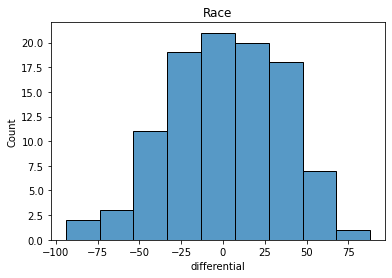

In [59]:
sns.histplot(data=race_results, x="differential").set(title='Race')

In [56]:
elderly_results = compare_by_bias_dimension(df,'elderly')

[Text(0.5, 1.0, 'Elderly')]

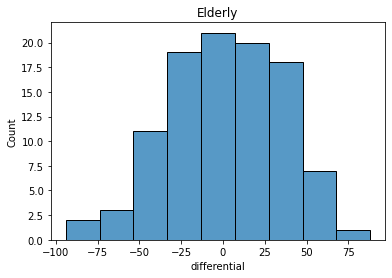

In [58]:
sns.histplot(data=elderly_results, x="differential").set(title='Elderly')

In [60]:
kids_results = compare_by_bias_dimension(df,'kids')

[Text(0.5, 1.0, 'Kids')]

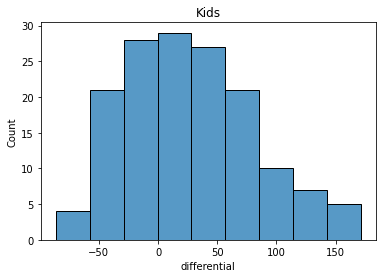

In [61]:
sns.histplot(data=kids_results, x="differential").set(title='Kids')

In [62]:
women_results = compare_by_bias_dimension(df,'women')

[Text(0.5, 1.0, 'Women')]

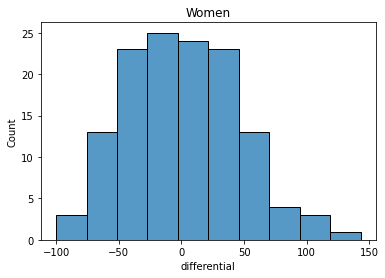

In [63]:
sns.histplot(data=women_results, x="differential").set(title='Women')

In [64]:
nonus_results = compare_by_bias_dimension(df,'non_us')

[Text(0.5, 1.0, 'Non_US')]

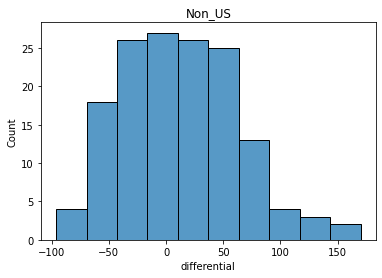

In [65]:
sns.histplot(data=nonus_results, x="differential").set(title='Non_US')

In [66]:
sex_results = compare_by_bias_dimension(df,'sexual_minorities')

[Text(0.5, 1.0, 'Sexual Minorities')]

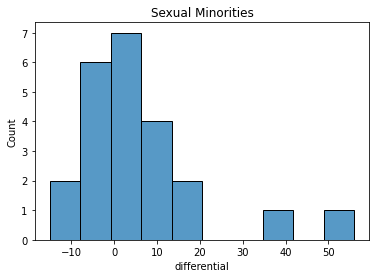

In [67]:
sns.histplot(data=sex_results, x="differential").set(title='Sexual Minorities')